**Inteligencia Artificial**

inteligencia artificial que predice si una persona tiene neumonia apartir de su radiografia de torax, usando una red neuronal convolucional

In [41]:
#librerias
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

el primer paso es cargar el dataset de entrenamiento.

In [42]:
path='dataset/train' #esta es la ruta donde se encuntra la base de datos de entrenamiento
files=os.listdir(path)
imagenes=[]
etiquetas=[]

creamos los array donde guardaremos las etiquetas y las imagenes.

In [43]:
files

['NORMAL', 'PNEUMONIA']

In [44]:

len(os.listdir(path+'/Normal')),len(os.listdir(path+'/Pneumonia'))

(1341, 1341)

In [45]:
for i in files:
    for j in os.listdir(path+'/'+i):
        img=Image.open(path+'/'+i+'/'+j)
        img=img.resize((150,150))
        img=img.convert('L')
        imagenes.append(np.array(img))
        etiquetas.append(i)

In [46]:
imagenes=np.array(imagenes)
imagenes=imagenes.reshape(imagenes.shape[0],150,150)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
etiquetas=le.fit_transform(etiquetas)

In [48]:
imagenes=imagenes/255

In [83]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,1)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])


In [84]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [95]:

history=modelo.fit(imagenes,etiquetas,epochs=10)

Epoch 1/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0888 - accuracy: 0.9646
Epoch 2/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0827 - accuracy: 0.9679
Epoch 3/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0645 - accuracy: 0.9750
Epoch 4/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0810 - accuracy: 0.9672
Epoch 5/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0617 - accuracy: 0.9780
Epoch 6/10
84/84 [==============================] - 2s 18ms/step - loss: 0.1011 - accuracy: 0.9620
Epoch 7/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0646 - accuracy: 0.9780
Epoch 8/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0592 - accuracy: 0.9791
Epoch 9/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0963 - accuracy: 0.9642
Epoch 10/10
84/84 [==============================] - 2s 18ms/step - loss: 0.0598 - accuracy: 0.9773


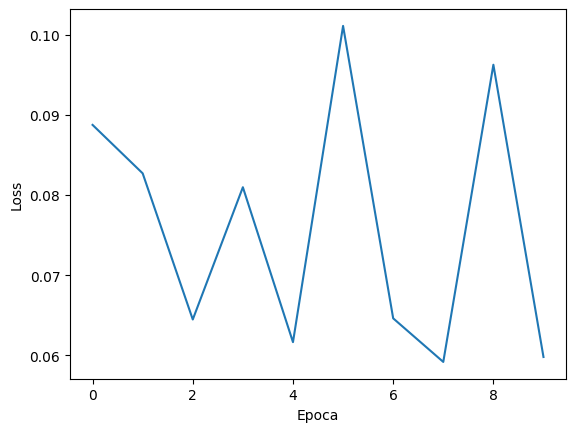

In [102]:
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [103]:
#cargamos el dataset de validacion
path='dataset/val'
files=os.listdir(path)
imagenes_val=[]
etiquetas_val=[]
for i in files:
    for j in os.listdir(path+'/'+i):
        img=Image.open(path+'/'+i+'/'+j)
        img=img.resize((150,150))
        img=img.convert('L')
        imagenes_val.append(np.array(img))
        etiquetas_val.append(i)

imagenes_val=np.array(imagenes_val)
imagenes_val=imagenes_val.reshape(imagenes_val.shape[0],150,150)
etiquetas_val=le.fit_transform(etiquetas_val)
imagenes_val=imagenes_val/255

modelo.evaluate(imagenes_val,etiquetas_val)


4/4 [==============================] - 0s 3ms/step - loss: 0.9075 - accuracy: 0.7845


[0.9075457453727722, 0.7844827771186829]

4/4 [==============================] - 0s 3ms/step


<AxesSubplot: >

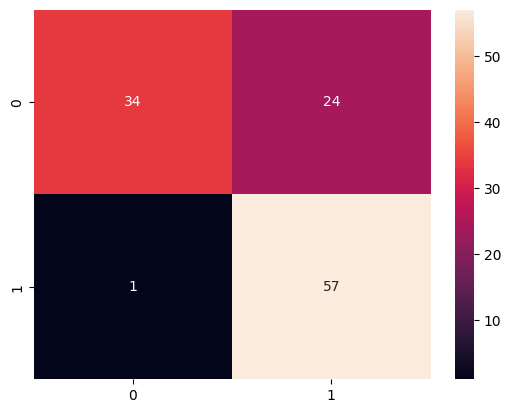

In [99]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicciones=modelo.predict(imagenes_val)
predicciones=np.argmax(predicciones,axis=1)
matriz=confusion_matrix(etiquetas_val,predicciones)
sns.heatmap(matriz,annot=True,fmt='d')

In [100]:
#calcular la exactitud,presicion, recall y f1-score
from sklearn.metrics import classification_report
print(classification_report(etiquetas_val,predicciones))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73        58
           1       0.70      0.98      0.82        58

    accuracy                           0.78       116
   macro avg       0.84      0.78      0.78       116
weighted avg       0.84      0.78      0.78       116



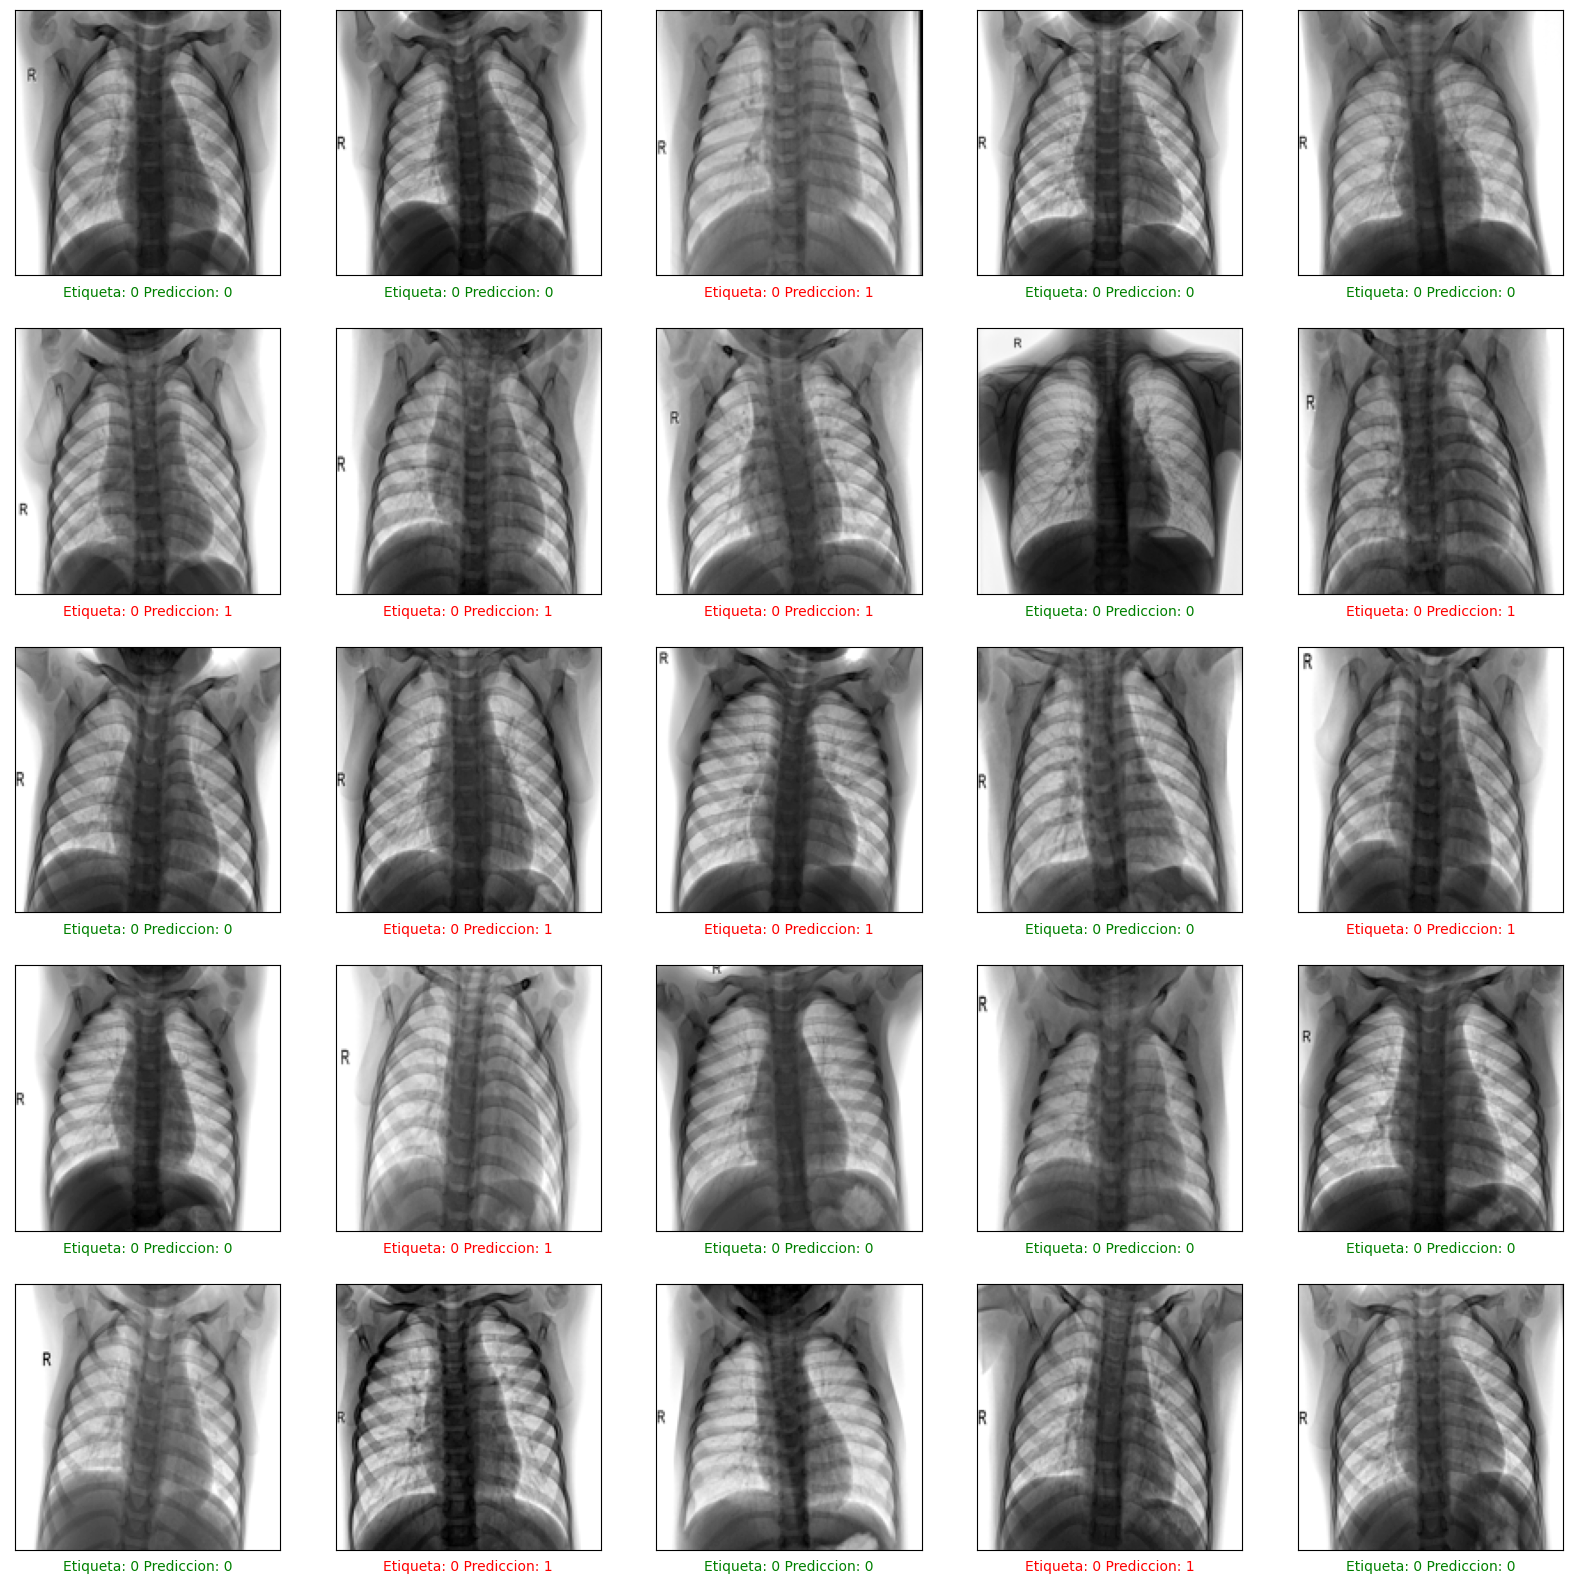

In [112]:
#graficar las imaveres de validacion con sus respectivas etiquetas y predicciones del modelo
import random
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_val[i], cmap=plt.cm.binary)
    color = 'green' if predicciones[i] == etiquetas_val[i] else 'red'
    plt.xlabel("Etiqueta: {} Prediccion: {}".format(etiquetas_val[i], predicciones[i]), color=color)
plt.show()


15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.44      0.60       234
           1       0.64      0.98      0.77       234

    accuracy                           0.71       468
   macro avg       0.80      0.71      0.69       468
weighted avg       0.80      0.71      0.69       468



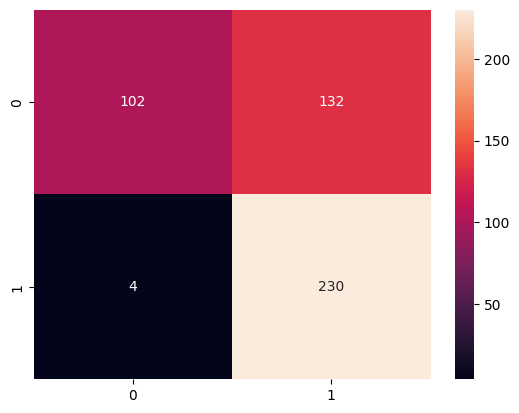

In [57]:
#fase de test del modelo con imagenes de prueba
path='dataset/test'
files=os.listdir(path)
imagenes_test=[]
etiquetas_test=[]
for i in files:
    for j in os.listdir(path+'/'+i):
        img=Image.open(path+'/'+i+'/'+j)
        img=img.resize((150,150))
        img=img.convert('L')
        imagenes_test.append(np.array(img))
        etiquetas_test.append(i)

imagenes_test=np.array(imagenes_test)
imagenes_test=imagenes_test.reshape(imagenes_test.shape[0],150,150)
etiquetas_test=le.fit_transform(etiquetas_test)
imagenes_test=imagenes_test/255

modelo.evaluate(imagenes_test,etiquetas_test)

#matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicciones=modelo.predict(imagenes_test)
predicciones=np.argmax(predicciones,axis=1)
matriz=confusion_matrix(etiquetas_test,predicciones)
sns.heatmap(matriz,annot=True,fmt='d')

#calcular la exactitud,presicion, recall y f1-score
from sklearn.metrics import classification_report
print(classification_report(etiquetas_test,predicciones))

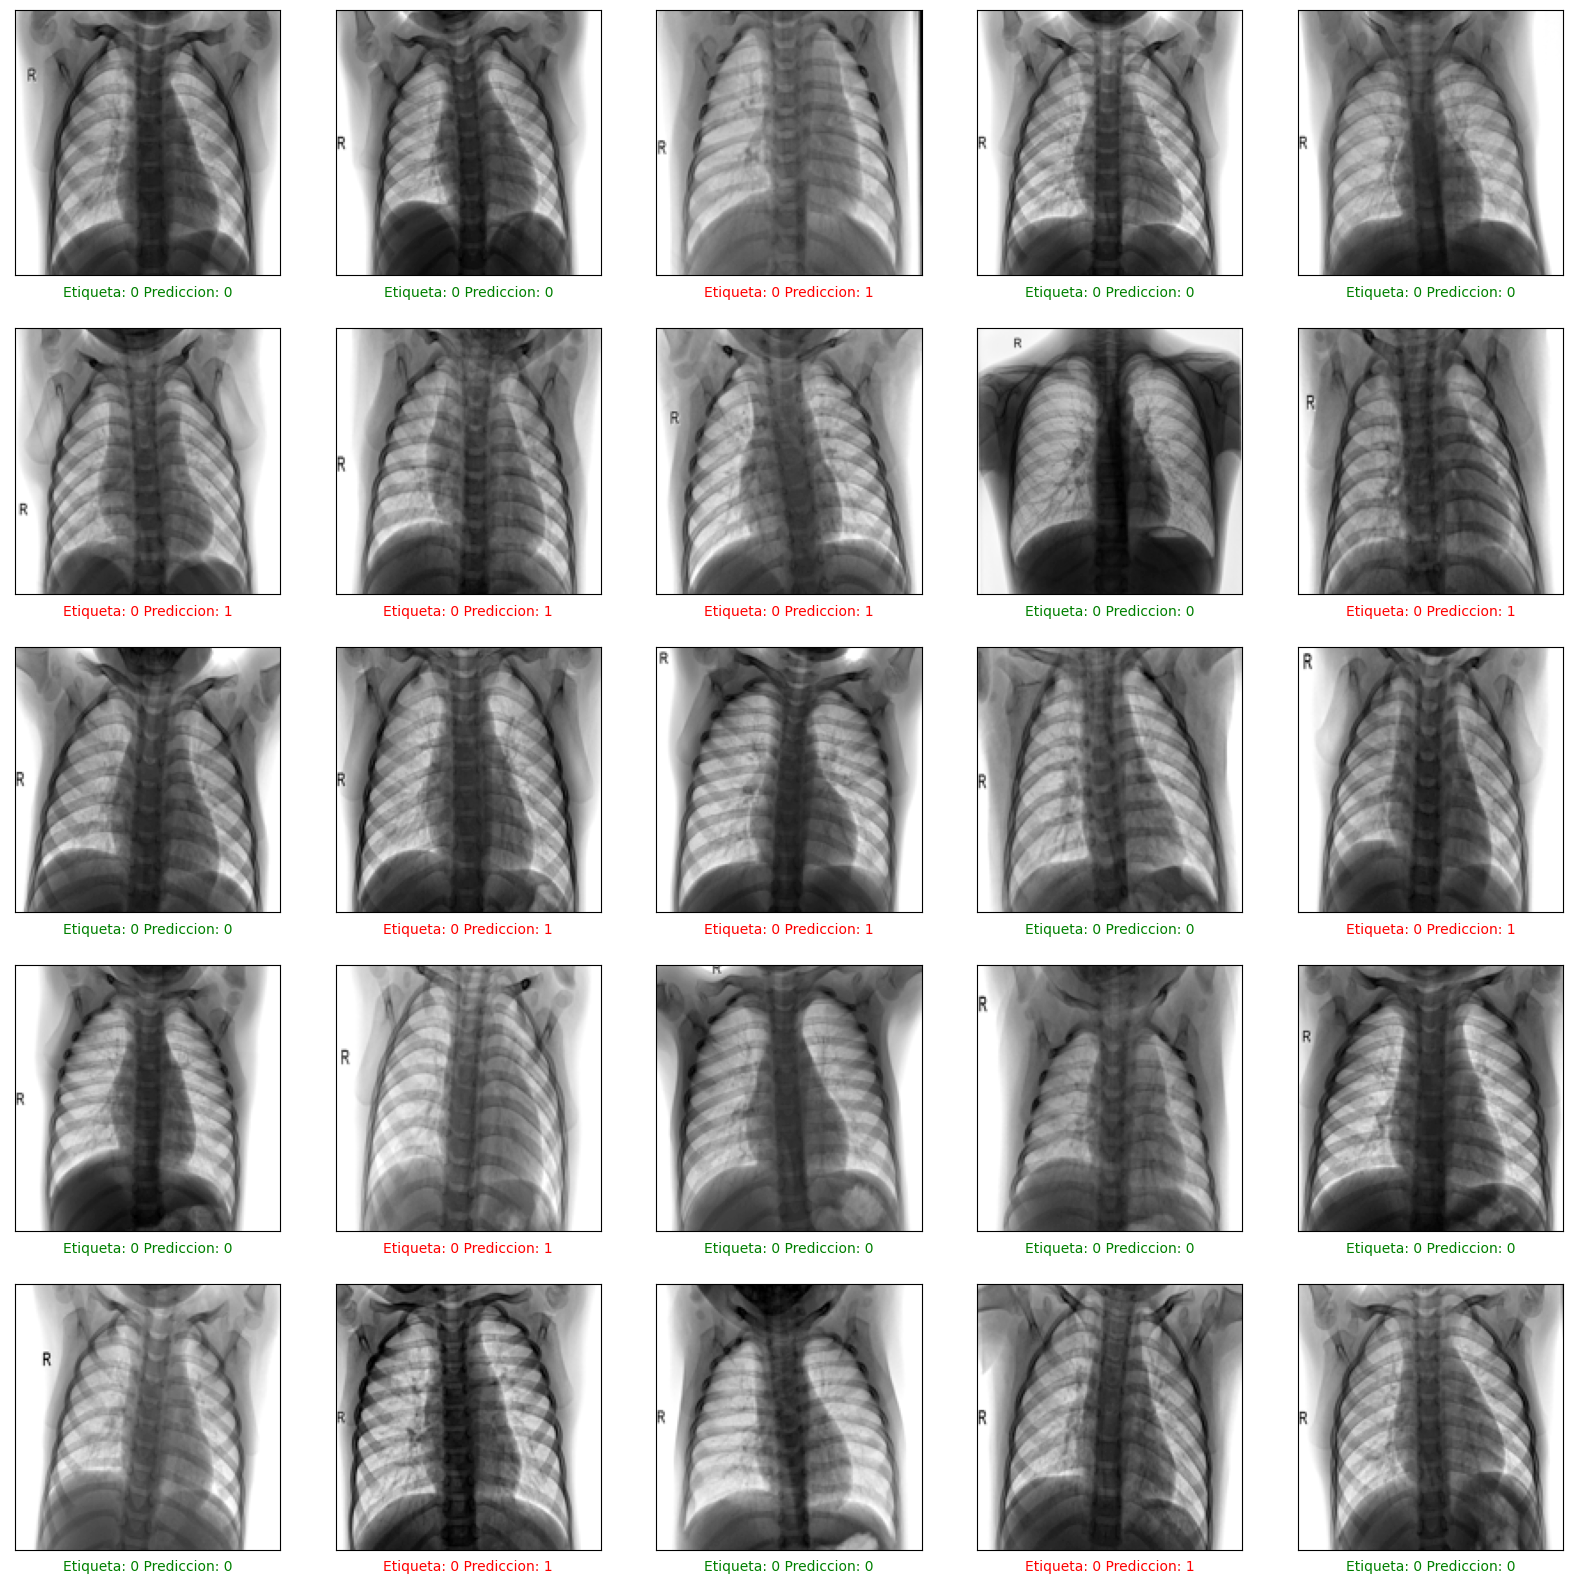

In [111]:
#graficar las imaveres de validacion con sus respectivas etiquetas y predicciones del modelo
import random
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_val[i], cmap=plt.cm.binary)
    color = 'green' if predicciones[i] == etiquetas_val[i] else 'red'
    plt.xlabel("Etiqueta: {} Prediccion: {}".format(etiquetas_val[i], predicciones[i]), color=color)
plt.show()

In [59]:
#guardar el modelo
modelo.save('modelo.h5')